In [ ]:
#code ici

In [ ]:
#code here 

In [ ]:
#code 

1 - Algorithm’s implementation ( code)

Pour implémenter l'algorithme, on va commencer par implémenter un graphe
On a décidé d'utiliser une librairie pour créer l'objet graphe car elle est optimisée et possède des fonctions qui nous intéressent
Voici la fonction pour la génération d'un graphe :

In [36]:
import matplotlib.pyplot as plt
#pip install networkx
import networkx as nx


class Graph:
    def __init__(self, num_nodes, max_edge):
        self.graph = nx.Graph()
        self.generate_random_graph(num_nodes, max_edge, 10, 100)

    def generate_random_graph(self, num_nodes, max_edges_per_node, min_weight, max_weight):
        print("---------------------------------------------------------")
        print(f"Generating Graph with {num_nodes} nodes")
        tic = time.perf_counter()

        # Ajouter les nœuds au graphe avec des coordonnées aléatoires
        for node in range(num_nodes):
            x = random.uniform(min_weight, max_weight)
            y = random.uniform(min_weight, max_weight)
            self.graph.add_node(node, pos=(x, y))

        # Générer les arêtes avec des poids correspondant à la distance euclidienne
        for node in range(num_nodes):
            num_edges = random.randint(1, max_edges_per_node)
            dest_nodes = random.sample(range(num_nodes), num_edges)

            for dest_node in dest_nodes:
                if node != dest_node:
                    pos1 = self.graph.nodes[node]['pos']
                    pos2 = self.graph.nodes[dest_node]['pos']
                    distance = math.sqrt((pos2[0] - pos1[0]) ** 2 + (pos2[1] - pos1[1]) ** 2)
                    weight = int(distance)
                    self.graph.add_edge(node, dest_node, weight=weight)

        toc = time.perf_counter()
        print(f"Generation done in {toc - tic:0.4f} seconds")
        print("---------------------------------------------------------")

    def data_graph(self):
        for node in self.graph.nodes:
            list_values = []
            print(f"Node : {node}")
            for edge in self.graph.neighbors(node):
                values = dict()
                values[edge] = self.graph[node][edge]['weight']
                list_values.append(values)
            print(list_values)

    def plot_graph(self, paths=None, colors=None):
        # Obtenir les positions des nœuds pour le tracé
        pos = nx.get_node_attributes(self.graph, 'pos')

        # Dessiner le graphe avec les arêtes des chemins coloriées
        nx.draw(self.graph, pos=pos, width=0.8, with_labels=True)

        if paths is not None:
            if colors is None:
                colors = ['black'] * len(paths)  # Par défaut, utiliser la couleur noire pour tous les chemins
            elif len(colors) < len(paths):
                raise ValueError("Le nombre de couleurs fourni est inférieur au nombre de chemins.")

            for path, color in zip(paths, colors):
                edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
                nx.draw_networkx_edges(self.graph, pos=pos, edgelist=edges, edge_color=color, width=2)

        plt.show()


# Nombre maximum de sommets
num_nodes = 10
# Nombre maximum d'arretes par sommet
max_edges_per_node = 5

graph = Graph(num_nodes, max_edges_per_node)

# Point de départ
start = 1

# Point d'arrivée
end = 5


---------------------------------------------------------
Generating Graph with 10 nodes
Generation done in 0.0003 seconds
---------------------------------------------------------


Pour afficher le contenu de ce graph, on a des fonctions associées :

Node : 0
[{8: 82}, {5: 39}, {9: 63}, {4: 24}, {2: 13}, {3: 58}, {6: 68}]
Node : 1
[{4: 45}, {6: 29}, {2: 63}, {8: 22}, {7: 19}, {9: 9}]
Node : 2
[{1: 63}, {5: 36}, {8: 81}, {0: 13}, {6: 70}, {7: 81}, {9: 62}]
Node : 3
[{4: 45}, {0: 58}, {8: 27}]
Node : 4
[{0: 24}, {1: 45}, {3: 45}, {8: 64}, {9: 44}]
Node : 5
[{0: 39}, {2: 36}, {8: 45}, {6: 38}, {7: 46}]
Node : 6
[{1: 29}, {5: 38}, {2: 70}, {0: 68}, {9: 20}]
Node : 7
[{5: 46}, {1: 19}, {8: 21}, {2: 81}, {9: 25}]
Node : 8
[{0: 82}, {1: 22}, {2: 81}, {3: 27}, {4: 64}, {5: 45}, {7: 21}]
Node : 9
[{0: 63}, {4: 44}, {2: 62}, {7: 25}, {6: 20}, {1: 9}]


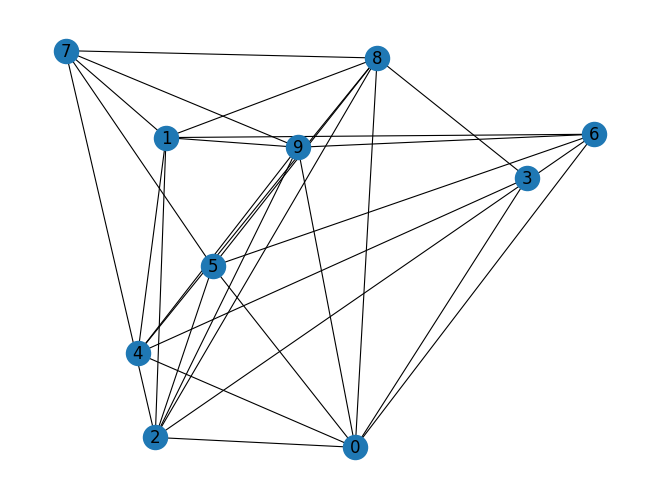

In [37]:
graph.data_graph()
graph.plot_graph()

In [40]:
from collections import deque
import heapq
import math


def dijkstra(self, start, end):
    distances = {node: float('inf') for node in self.graph.nodes}
    distances[start] = 0

    heap = [(0, start)]
    while heap:
        current_cost, current_node = heapq.heappop(heap)

        if current_node == end:
            break

        for neighbor in self.graph.neighbors(current_node):
            cost = self.graph[current_node][neighbor]['weight']
            new_cost = current_cost + cost
            if new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                heapq.heappush(heap, (new_cost, neighbor))

    path = reconstruct_path(graph, start, end, distances)

    return path, distances[end]


def reconstruct_path(self, start, end, distances):
    current_node = end
    path = [current_node]
    while current_node != start:
        neighbors = self.graph.neighbors(current_node)
        min_neighbor = None
        min_cost = float('inf')
        for neighbor in neighbors:
            cost = self.graph[current_node][neighbor]['weight']
            if distances[neighbor] + cost < min_cost:
                min_neighbor = neighbor
                min_cost = distances[neighbor] + cost
        path.append(min_neighbor)
        current_node = min_neighbor
    path.reverse()
    return path


def a_star(self, start, end):
    # Distances du point de départ à chaque nœud (g-cost)
    distances = {node: float('inf') for node in self.graph.nodes}
    distances[start] = 0

    # Estimations des coûts du point de départ à chaque nœud (f-cost)
    estimations = {node: heuristic(graph, node, end) for node in self.graph.nodes}

    # File de priorité pour l'exploration des nœuds
    heap = [(estimations[start], 0, start)]  # (f-cost, g-cost, node)

    # Dictionnaire pour stocker les nœuds précédents sur le chemin optimal
    came_from = {}

    while heap:
        _, current_cost, current_node = heapq.heappop(heap)

        if current_node == end:
            break

        for neighbor in self.graph.neighbors(current_node):
            cost = self.graph[current_node][neighbor]['weight']
            new_cost = current_cost + cost
            if new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                priority = new_cost + heuristic(graph, neighbor, end)
                heapq.heappush(heap, (priority, new_cost, neighbor))
                came_from[neighbor] = current_node

    path = reverse_path(start, end, came_from)

    return path, distances[end]


def heuristic(self, node, goal):
    # Heuristique utilisée pour estimer le coût restant (ici, distance euclidienne)
    pos1 = self.graph.nodes[node]['pos']
    pos2 = self.graph.nodes[goal]['pos']
    distance = math.sqrt((pos2[0] - pos1[0]) ** 2 + (pos2[1] - pos1[1]) ** 2)
    return distance


def reverse_path(start, end, came_from):
    current_node = end
    path = [current_node]
    while current_node != start:
        current_node = came_from[current_node]
        path.append(current_node)
    path.reverse()
    return path


def valeur_contenu(self, source, destination):
    if source != destination:
        return self.graph[source][destination]['weight']
    return float('inf')


def calculer_distance(chemin):
    distance_totale = 0

    for i in range(len(chemin) - 1):
        source = chemin[i]
        destination = chemin[i + 1]
        distance = valeur_contenu(graph, source, destination)
        distance_totale += distance

    return distance_totale


def tabou_search(solution_initiale, destination_finale, taille_tabou, iter_max):
    nb_iter = 0
    liste_tabou = deque(maxlen=taille_tabou)

    solution_courante = [solution_initiale]
    meilleurs_voisin = solution_courante
    meilleure_globale = solution_courante

    # Avoir une valeur élevée juste pour pouvoir comparer :
    valeur_meilleure_globale = float('inf')

    liste_tabou.append(solution_courante)

    while nb_iter < iter_max:
        valeur_meilleure = float('inf')

        # Parcours des voisins
        for voisin in voisinage(graph, solution_courante[-1], liste_tabou, destination_finale, solution_courante):
            valeur_to_voisin = valeur_contenu(graph, solution_courante[-1], voisin)
            # Selection du meilleur voisin
            if valeur_to_voisin < valeur_meilleure:
                meilleurs_voisin = voisin
            # Changement de la meilleure valeur pour continuer de comparer
            valeur_meilleure = valeur_contenu(graph, solution_courante[-1], voisin)

        # Permet de garder la valeur du chemin avec le dernier meilleur voisin
        if valeur_contenu(graph, solution_courante[-1], meilleurs_voisin) < valeur_meilleure_globale:
            meilleure_globale.append(meilleurs_voisin)
            if solution_courante[-1] != meilleurs_voisin:
                valeur_meilleure_globale = valeur_contenu(graph, solution_courante[-1], meilleurs_voisin)
            nb_iter = 0
        else:
            nb_iter += 1

        # Progression dans le graphe en prenant le meilleur voisin
        solution_courante = meilleure_globale
        liste_tabou.append(meilleurs_voisin)

        if solution_courante[-1] == destination_finale:
            break

    distance_meilleure_globale = calculer_distance(meilleure_globale)
    return meilleure_globale, distance_meilleure_globale


def voisinage(self, node, visited, destination_finale, solution_courante):
    voisins = []
    for v in self.graph.neighbors(node):
        if v not in visited or v == destination_finale:
            if v not in solution_courante:
                voisins.append(v)
    return voisins


print(dijkstra(graph, start, end))
print(a_star(graph, start, end))
print(tabou_search(start, end, 10, 200))

([1, 7, 5], 65)
([1, 7, 5], 65)
([1, 9, 6, 0, 2, 5], 146)


A présent, créeons les objets et une fonction permettant de déterminer le meilleur itinéraire en fonction du coût le plus faible

In [43]:
import itertools
import time
import random


def create_objects(max_entiers, max_valeur, start, end):
    if max_entiers > max_valeur - 2:
        raise ValueError("Le maximum d'entiers ne peut pas être supérieur à la différence entre max_valeur et 2")

    entiers = list(set(range(max_valeur)) - {start, end})
    entiers = random.sample(entiers, max_entiers)
    return entiers


def best_itinerary(self, points, start, end):
    print("---------------------------------------------------------")
    print(f"Looking for Best Path:")
    tic = time.perf_counter()

    best_objects_path = [start]
    chemin_global = []
    cout_meilleur_chemin = float('inf')

    for permutation in itertools.permutations(points):
        _, cout_start = dijkstra(graph, start, permutation[0])
        cout_total = cout_start

        paths = []

        for i in range(len(permutation) - 1):
            point_actuel = permutation[i]
            point_suivant = permutation[i + 1]
            path, cout = dijkstra(graph, point_actuel, point_suivant)
            cout_total += cout
            paths.extend(path)

        if cout_total < cout_meilleur_chemin:
            cout_meilleur_chemin = cout_total
            best_objects_path = list(permutation)
            chemin_global = paths[:]

    chemin_global = remove_consecutive_duplicates(chemin_global)
    chemin_global.insert(0, start)
    chemin_global.append(end)
    toc = time.perf_counter()

    print(f"Objects Path: {best_objects_path}")
    print(f"Path: {chemin_global}")
    print(f"Cost: {cout_meilleur_chemin}")
    print(f"Duration: {toc - tic:0.4f} seconds")
    print("---------------------------------------------------------")

    return best_objects_path, cout_meilleur_chemin, chemin_global


def remove_consecutive_duplicates(lst):
    result = [lst[0]]  # Ajouter le premier élément à la liste résultat

    for i in range(1, len(lst)):
        if lst[i] != lst[i - 1]:
            result.append(lst[i])  # Ajouter l'élément à la liste résultat s'il est différent du précédent

    return result


def base_itinerary_cost(self, path):
    distance_totale = 0

    for i in range(len(path) - 1):
        source = path[i]
        destination = path[i + 1]
        _, distance = self.dijkstra(source, destination)
        distance_totale += distance

    return distance_totale

---------------------------------------------------------
Looking for Best Path:
Objects Path: [7, 0]
Path: [1, 7, 5, 0, 1]
Cost: 104
Duration: 0.0004 seconds
---------------------------------------------------------


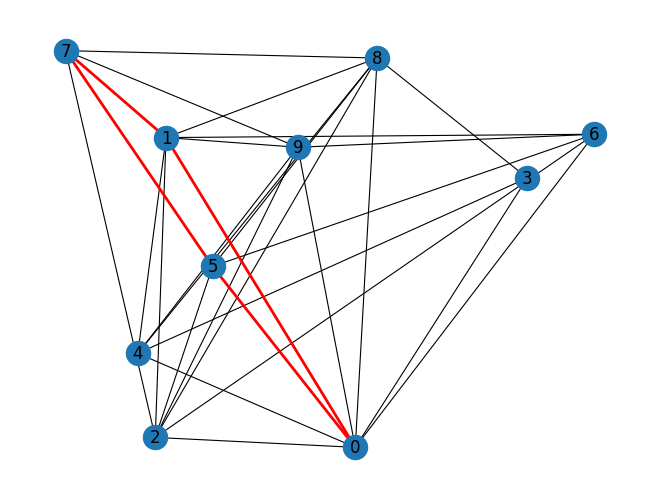

In [44]:
# Générer la liste d'objets (sommets à visiter)
obj = create_objects(2, num_nodes, start, end)

# Détermine le meilleur chemin qui passe par les points générés
path, cost, chemin_g = best_itinerary(graph, obj, start, start)
graph.plot_graph([chemin_g], ['red'])

In [ ]:
#code

In [ ]:
#code pour le temps d'éxecution

In [ ]:
#code

In [ ]:
#code

In [ ]:
#code pour le temps d'éxecution 